In [6]:
"""
Opis:
------
Skrypt wykonuje klasyfikację cukrzycy na podstawie danych z pliku `diabetes.csv`.
Wykorzystuje klasyfikatory Drzewa Decyzyjnego i SVM do przewidywania wyniku (Outcome), który wskazuje na obecność lub brak cukrzycy.
Możliwe wartości:
- `Outcome = 1`: cukrzyca
- `Outcome = 0`: brak cukrzycy.

Autor: Karol Szmajda
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie zbioru danych
data = pd.read_csv('diabetes.csv', sep=',')

# Przygotowanie macierzy cech (X) i zmiennej celu (y)
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
# Skalowanie danych wejściowych w taki sposób, aby miały średnią 0 i odchylenie standardowe 1.
# Standaryzacja poprawia skuteczność algorytmów uczących się.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Dopasowanie skalera do danych treningowych i skalowanie
X_test = scaler.transform(X_test)       # Skalowanie danych testowych na podstawie dopasowanego skalera


Metryki klasyfikacji dla Drzewa Decyzyjnego i SVM:
Metryka        Drzewo Decyzyjne    SVM                 
Dokładność     0.75                0.73                
Precyzja       0.76                0.73                
Czułość        0.75                0.73                
F1-score       0.75                0.73                


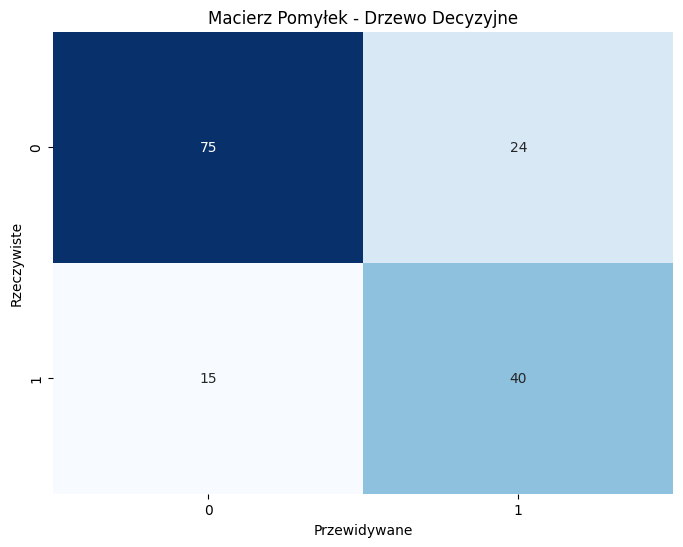

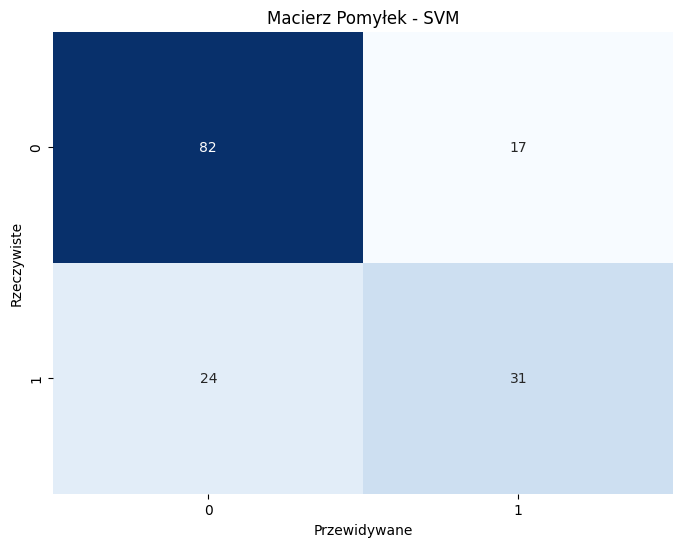

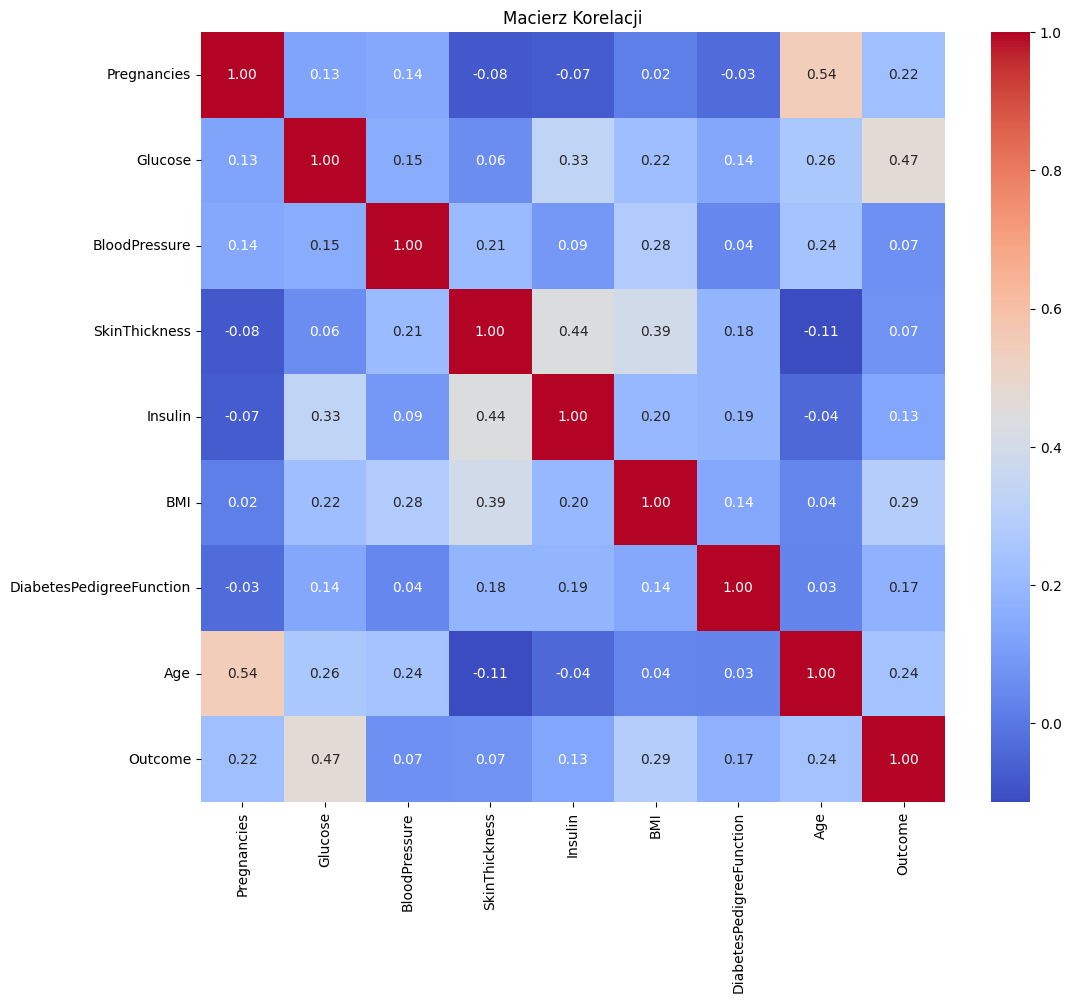

In [7]:
# Klasyfikator Drzewa Decyzyjnego
# ---------------------------------
# Trenowanie drzewa decyzyjnego na danych treningowych
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Przewidywanie etykiet dla zbioru testowego
dt_predictions = dt_classifier.predict(X_test)

# Obliczanie metryk dla drzewa decyzyjnego
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted', zero_division=0)
dt_recall = recall_score(y_test, dt_predictions, average='weighted', zero_division=0)
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Klasyfikator SVM
# -----------------
# Trenowanie modelu SVM na danych treningowych
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Przewidywanie etykiet dla zbioru testowego
svm_predictions = svm_classifier.predict(X_test)

# Obliczanie metryk dla SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Wyświetlenie metryk w formacie tabelarycznym
# ---------------------------------------------
print("\nMetryki klasyfikacji dla Drzewa Decyzyjnego i SVM:")
print(f"{'Metryka':<15}{'Drzewo Decyzyjne':<20}{'SVM':<20}")
print(f"{'Dokładność':<15}{dt_accuracy:<20.2f}{svm_accuracy:<20.2f}")
print(f"{'Precyzja':<15}{dt_precision:<20.2f}{svm_precision:<20.2f}")
print(f"{'Czułość':<15}{dt_recall:<20.2f}{svm_recall:<20.2f}")
print(f"{'F1-score':<15}{dt_f1:<20.2f}{svm_f1:<20.2f}")

# Wizualizacja macierzy pomyłek
# ------------------------------
# Drzewo Decyzyjne
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz Pomyłek - Drzewo Decyzyjne')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

# SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz Pomyłek - SVM')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

# Macierz korelacji
# ------------------
# Wizualizacja korelacji między cechami w danych
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz Korelacji')
plt.show()

In [9]:
# Tabela z danymi wejściowymi
manual_inputs = np.array([
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],  # Przykład 1
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],   # Przykład 2
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],   # Przykład 3
])

# Skalowanie danych wejściowych
# Standaryzacja danych wejściowych przy użyciu wcześniej wytrenowanego skalera.
manual_inputs_scaled = scaler.transform(manual_inputs)

# Przewidywanie za pomocą wytrenowanych klasyfikatorów
# Drzewo Decyzyjne i SVM przewidują etykiety na podstawie skalowanych danych.
manual_dt_predictions = dt_classifier.predict(manual_inputs_scaled)
manual_svm_predictions = svm_classifier.predict(manual_inputs_scaled)

np.set_printoptions(suppress=True, precision=3)

# Wyświetlanie wyników
# Dla każdego wiersza danych wejściowych wyświetlane są:
# - Oryginalne dane wejściowe
# - Przewidywania Drzewa Decyzyjnego
# - Przewidywania SVM
print("\nPrzewidywania dla ręcznie wprowadzonych danych wejściowych:")
for i, input_data in enumerate(manual_inputs):
    print(f"Przykład {i+1}:")
    print(f"Wejście (oryginalne): {input_data}")
    print(f"Przewidywanie Drzewa Decyzyjnego: {'Cukrzyca' if manual_dt_predictions[i] == 1 else 'Brak cukrzycy'}")
    print(f"Przewidywanie SVM: {'Cukrzyca' if manual_svm_predictions[i] == 1 else 'Brak cukrzycy'}")
    print()


Przewidywania dla ręcznie wprowadzonych danych wejściowych:
Przykład 1:
Wejście (oryginalne): [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
Przewidywanie Drzewa Decyzyjnego: Cukrzyca
Przewidywanie SVM: Cukrzyca

Przykład 2:
Wejście (oryginalne): [ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]
Przewidywanie Drzewa Decyzyjnego: Brak cukrzycy
Przewidywanie SVM: Brak cukrzycy

Przykład 3:
Wejście (oryginalne): [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
Przewidywanie Drzewa Decyzyjnego: Cukrzyca
Przewidywanie SVM: Cukrzyca

